In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


In [2]:
df= pd.read_csv('Stock_Exchange.csv')
df.head()

,Record ID,horizon,amount,Concatenated Segment,Date1,Date2,BUY,SELL,expected_return,inf
0,1,720,200,BBY-RETAIL-200,05-10-2018,24-09-2020,68.184349,104.197197,0.517411,1.68
1,2,330,15000,BAC-BANK-15000,22-11-2016,18-10-2017,18.616749,24.654472,0.170969,-0.20
2,3,7,3000,AXP-BANK-3000,27-09-2016,04-10-2016,59.862297,59.517727,0.002824,-0.20
3,4,5,20000,KSS-RETAIL-20000,11-10-2016,17-10-2016,38.216724,35.985329,0.000094,-0.20
4,5,360,15000,JPM-BANK-15000,12-03-2015,07-03-2016,51.869335,52.047966,0.149979,-0.50


In [3]:
df.dtypes

Record ID                 int64
horizon                   int64
amount                    int64
Concatenated Segment     object
Date1                    object
Date2                    object
BUY                     float64
SELL                    float64
expected_return         float64
inf                     float64
dtype: object

In [4]:
df['Date1'].nunique()

2228

In [5]:
df1= df.copy()
df1.head(70)

,Record ID,horizon,amount,Concatenated Segment,Date1,Date2,BUY,SELL,expected_return,inf
0,1,720,200,BBY-RETAIL-200,05-10-2018,24-09-2020,68.184349,104.197197,0.517411,1.68
1,2,330,15000,BAC-BANK-15000,22-11-2016,18-10-2017,18.616749,24.654472,0.170969,-0.20
2,3,7,3000,AXP-BANK-3000,27-09-2016,04-10-2016,59.862297,59.517727,0.002824,-0.20
3,4,5,20000,KSS-RETAIL-20000,11-10-2016,17-10-2016,38.216724,35.985329,0.000094,-0.20
4,5,360,15000,JPM-BANK-15000,12-03-2015,07-03-2016,51.869335,52.047966,0.149979,-0.50
...,...,...,...,...,...,...,...,...,...,...
65,66,100,50000,DB-BANK-50000,01-05-2017,09-08-2017,17.521255,17.098944,-0.038611,1.96
66,67,40,10000,KSS-RETAIL-10000,03-06-2016,13-07-2016,30.908514,31.690491,0.000751,-0.20
67,68,7,4000,HMC/AUTO/4000,26-07-2016,02-08-2016,26.959999,28.049999,-0.000176,-0.20
68,69,330,400,UBS-BANK-400,07-06-2018,03\05\2019,13.859125,11.880524,-0.035709,1.68


In [6]:
df1['Date1']=df1['Date1'].str.replace('.','-')

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/1113978437.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Date1']=df1['Date1'].str.replace('.','-')


In [7]:
df1['Date2']=df1['Date2'].str.replace('.','-')

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/3599774856.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Date2']=df1['Date2'].str.replace('.','-')


In [8]:
df1['Date2']=df1['Date2'].str.replace("\\","-")

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/1158079283.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Date2']=df1['Date2'].str.replace("\\","-")


In [9]:
df1['Date1'].unique()

array(['05-10-2018', '22-11-2016', '27-09-2016', ..., '31-09-2016',
       '31-11-2016', '30-02-2017'], dtype=object)

In [10]:
df1['Date2'].unique()

array(['24-09-2020', '18-10-2017', '04-10-2016', ..., '01-09-2020',
       '17-09-2020', '16-06-2020'], dtype=object)

In [11]:
df1.iloc[22025:22035,:]

,Record ID,horizon,amount,Concatenated Segment,Date1,Date2,BUY,SELL,expected_return,inf
22025,22026,3,200,HMC/AUTO/200,28-12-2015,31-12-2015,32.220001,31.930000,-0.000075,-0.50
22026,22027,180,50,TSLA/AUTO/50,28-08-2017,23-02-2018,69.132004,70.410004,0.254336,1.96
22027,22028,270,4000,GOOG/TECH/4000,09-05-2018,04-02-2019,1082.760010,1132.800049,0.141568,1.68
22028,22029,120,1000,GM/AUTO/1000,07-11-2016,07-03-2017,27.707039,32.818405,0.013441,-0.20
22029,22030,3,25000,GOOG/TECH/25000,08-08-2016,11-08-2016,781.760010,784.849976,0.001573,-0.20
22030,22031,15,2000,HOG/AUTO/2000,19-04-2018,04-05-2018,37.653950,37.690720,0.001832,1.68
22031,22032,360,10000,KO-FMCG-10000,25-09-2018,20-09-2019,42.476089,51.739727,0.063533,1.68
22032,22033,540,1000,JPM-BANK-1000,05-04-2017,27-09-2018,77.400795,105.655067,0.224968,1.96
22033,22034,3,100,BAC-BANK-100,25-02-2014,28-02-2014,14.524656,14.693550,0.001554,-0.15
22034,22035,180,500,TSLA/AUTO/500,05-05-2017,01-11-2017,61.669998,64.216003,0.254336,1.96


In [12]:
df1["Date1"] = pd.to_datetime(df1["Date1"], format="%d-%m-%Y",errors= 'coerce')

In [13]:
df1["Date2"] = pd.to_datetime(df1["Date2"], format="%d-%m-%Y",errors= 'coerce')

In [14]:
df1.isnull().sum()

Record ID                0
horizon                  0
amount                   0
Concatenated Segment     0
Date1                   55
Date2                    0
BUY                      0
SELL                     0
expected_return          0
inf                      0
dtype: int64

In [15]:
df1['Date1'].nunique()

1248

In [16]:
df1.shape

(405258, 10)

In [17]:
df1['Date1'].mode()

0   2018-06-11
dtype: datetime64[ns]

In [18]:
df1.dropna(how='any',axis=0,inplace=True)

In [19]:
df1.isnull().sum()

Record ID               0
horizon                 0
amount                  0
Concatenated Segment    0
Date1                   0
Date2                   0
BUY                     0
SELL                    0
expected_return         0
inf                     0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405203 entries, 0 to 405257
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Record ID             405203 non-null  int64         
 1   horizon               405203 non-null  int64         
 2   amount                405203 non-null  int64         
 3   Concatenated Segment  405203 non-null  object        
 4   Date1                 405203 non-null  datetime64[ns]
 5   Date2                 405203 non-null  datetime64[ns]
 6   BUY                   405203 non-null  float64       
 7   SELL                  405203 non-null  float64       
 8   expected_return       405203 non-null  float64       
 9   inf                   405203 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 34.0+ MB


In [21]:
df1['Concatenated Segment']=df1['Concatenated Segment'].str.replace("\\","-")

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/3496458546.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Concatenated Segment']=df1['Concatenated Segment'].str.replace("\\","-")


In [22]:
df1['Concatenated Segment']=df1['Concatenated Segment'].str.replace("/","-")

In [23]:
df1.head()

,Record ID,horizon,amount,Concatenated Segment,Date1,Date2,BUY,SELL,expected_return,inf
0,1,720,200,BBY-RETAIL-200,2018-10-05,2020-09-24,68.184349,104.197197,0.517411,1.68
1,2,330,15000,BAC-BANK-15000,2016-11-22,2017-10-18,18.616749,24.654472,0.170969,-0.20
2,3,7,3000,AXP-BANK-3000,2016-09-27,2016-10-04,59.862297,59.517727,0.002824,-0.20
3,4,5,20000,KSS-RETAIL-20000,2016-10-11,2016-10-17,38.216724,35.985329,0.000094,-0.20
4,5,360,15000,JPM-BANK-15000,2015-03-12,2016-03-07,51.869335,52.047966,0.149979,-0.50


In [24]:
df1[['Company Name','Sector','Stock Pur.']] = df1['Concatenated Segment'].str.split('-',n=2, expand=True)
df1.head()

,Record ID,horizon,amount,Concatenated Segment,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
0,1,720,200,BBY-RETAIL-200,2018-10-05,2020-09-24,68.184349,104.197197,0.517411,1.68,BBY,RETAIL,200
1,2,330,15000,BAC-BANK-15000,2016-11-22,2017-10-18,18.616749,24.654472,0.170969,-0.20,BAC,BANK,15000
2,3,7,3000,AXP-BANK-3000,2016-09-27,2016-10-04,59.862297,59.517727,0.002824,-0.20,AXP,BANK,3000
3,4,5,20000,KSS-RETAIL-20000,2016-10-11,2016-10-17,38.216724,35.985329,0.000094,-0.20,KSS,RETAIL,20000
4,5,360,15000,JPM-BANK-15000,2015-03-12,2016-03-07,51.869335,52.047966,0.149979,-0.50,JPM,BANK,15000


In [25]:
df1['Stock Pur.']= df1['Stock Pur.'].astype('int')

In [26]:
df1.drop(['Concatenated Segment'],axis= 1,inplace=True)

In [27]:
df1.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
0,1,720,200,2018-10-05,2020-09-24,68.184349,104.197197,0.517411,1.68,BBY,RETAIL,200
1,2,330,15000,2016-11-22,2017-10-18,18.616749,24.654472,0.170969,-0.20,BAC,BANK,15000
2,3,7,3000,2016-09-27,2016-10-04,59.862297,59.517727,0.002824,-0.20,AXP,BANK,3000
3,4,5,20000,2016-10-11,2016-10-17,38.216724,35.985329,0.000094,-0.20,KSS,RETAIL,20000
4,5,360,15000,2015-03-12,2016-03-07,51.869335,52.047966,0.149979,-0.50,JPM,BANK,15000


In [28]:
df1.iloc

In [29]:
df1.sort_values(by=['Date1','Date2'],inplace=True)

In [30]:
df1

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
65161,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500
192471,192472,1,50000,2013-10-10,2013-10-11,41.744930,42.181133,-0.000386,1.41,DB,BANK,50000
192747,192748,1,100,2013-10-10,2013-10-11,14.473812,14.351554,0.001351,1.41,NVDA,TECH,100
194431,194432,2,50000,2013-10-10,2013-10-11,12.640936,12.605402,0.001036,1.41,BAC,BANK,50000
271636,271637,1,500,2013-10-10,2013-10-11,62.960190,62.985447,0.000266,1.41,WMT,RETAIL,500
...,...,...,...,...,...,...,...,...,...,...,...,...
138055,138056,720,25000,2018-10-09,2020-09-28,17.735668,17.219999,0.022665,1.68,SC,BANK,25000
141528,141529,720,5000,2018-10-09,2020-09-28,213.992935,340.042450,0.330255,1.68,COST,RETAIL,5000
147501,147502,720,25000,2018-10-09,2020-09-28,213.992935,340.042450,0.330255,1.68,COST,RETAIL,25000
250915,250916,720,10000,2018-10-09,2020-09-28,28.388853,23.940784,0.373023,1.68,BAC,BANK,10000


In [31]:
df2 = pd.read_csv('Stock_Exchange_Sheet-2.csv')
df2.head()

,HQ,Company
0,Ukraine,BBY
1,India,BAC
2,Russia,AXP
3,Australia,KSS
4,USA,JPM


In [32]:
df2.rename(columns= {'Company':'Company Name'},inplace= True)

In [33]:
df2['Company Name'].unique()

array(['BBY', 'BAC', 'AXP   ', 'KSS', 'JPM', 'PEP', 'FB', 'UBS', 'DB',
       'SC  ', 'GM', 'M', 'AMZN\n', 'TSLA', 'WMT', 'MSFT', 'HMC', 'AAPL',
       'COST', 'NVDA', 'KO', 'HOG', 'PG   ', 'F', 'TGT', 'GOOG', 'OR   '],
      dtype=object)

In [34]:
df2['Company Name']=df2['Company Name'].apply( lambda x: x.strip())

In [35]:
df2['Company Name'].unique()

array(['BBY', 'BAC', 'AXP', 'KSS', 'JPM', 'PEP', 'FB', 'UBS', 'DB', 'SC',
       'GM', 'M', 'AMZN', 'TSLA', 'WMT', 'MSFT', 'HMC', 'AAPL', 'COST',
       'NVDA', 'KO', 'HOG', 'PG', 'F', 'TGT', 'GOOG', 'OR'], dtype=object)

In [36]:
df3= pd.merge(df1,df2,how= 'inner',on= 'Company Name')

In [37]:
df3.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ
0,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500,France
1,125053,6,10000,2013-10-10,2013-10-16,65.346916,66.626457,0.001305,1.41,PEP,FMCG,10000,France
2,117195,50,4000,2013-10-10,2013-11-29,65.346916,68.400055,0.010877,1.41,PEP,FMCG,4000,France
3,47365,80,20000,2013-10-10,2013-12-30,65.346916,67.603004,0.017404,1.41,PEP,FMCG,20000,France
4,175544,120,50000,2013-10-10,2014-02-07,65.346916,65.409637,0.026105,1.41,PEP,FMCG,50000,France


In [39]:
df1.reset_index()

,index,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
0,65161,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500
1,192471,192472,1,50000,2013-10-10,2013-10-11,41.744930,42.181133,-0.000386,1.41,DB,BANK,50000
2,192747,192748,1,100,2013-10-10,2013-10-11,14.473812,14.351554,0.001351,1.41,NVDA,TECH,100
3,194431,194432,2,50000,2013-10-10,2013-10-11,12.640936,12.605402,0.001036,1.41,BAC,BANK,50000
4,271636,271637,1,500,2013-10-10,2013-10-11,62.960190,62.985447,0.000266,1.41,WMT,RETAIL,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405198,138055,138056,720,25000,2018-10-09,2020-09-28,17.735668,17.219999,0.022665,1.68,SC,BANK,25000
405199,141528,141529,720,5000,2018-10-09,2020-09-28,213.992935,340.042450,0.330255,1.68,COST,RETAIL,5000
405200,147501,147502,720,25000,2018-10-09,2020-09-28,213.992935,340.042450,0.330255,1.68,COST,RETAIL,25000
405201,250915,250916,720,10000,2018-10-09,2020-09-28,28.388853,23.940784,0.373023,1.68,BAC,BANK,10000


In [40]:
df1.columns

Index(['Record ID', 'horizon', 'amount', 'Date1', 'Date2', 'BUY', 'SELL',
       'expected_return', 'inf', 'Company Name', 'Sector', 'Stock Pur.'],
      dtype='object')

In [41]:
df1.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
65161,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500
192471,192472,1,50000,2013-10-10,2013-10-11,41.744930,42.181133,-0.000386,1.41,DB,BANK,50000
192747,192748,1,100,2013-10-10,2013-10-11,14.473812,14.351554,0.001351,1.41,NVDA,TECH,100
194431,194432,2,50000,2013-10-10,2013-10-11,12.640936,12.605402,0.001036,1.41,BAC,BANK,50000
271636,271637,1,500,2013-10-10,2013-10-11,62.960190,62.985447,0.000266,1.41,WMT,RETAIL,500


In [69]:
df3['Profit_Loss'] =((df3['SELL'] -df3['BUY']) *df3['Stock Pur.'])
df3.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ,Profit_Loss
0,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500,France,170.070645
1,125053,6,10000,2013-10-10,2013-10-16,65.346916,66.626457,0.001305,1.41,PEP,FMCG,10000,France,12795.410100
2,117195,50,4000,2013-10-10,2013-11-29,65.346916,68.400055,0.010877,1.41,PEP,FMCG,4000,France,12212.554920
3,47365,80,20000,2013-10-10,2013-12-30,65.346916,67.603004,0.017404,1.41,PEP,FMCG,20000,France,45121.765200
4,175544,120,50000,2013-10-10,2014-02-07,65.346916,65.409637,0.026105,1.41,PEP,FMCG,50000,France,3136.062500


### Ques 1) Find the number of record ID’s where the stocks were sold in less than 2 months from the stock      buying date combined in the years 2016 – 2017.

In [42]:
Date_diff= df1[(df1['Date2']>="2016-01-01" ) & (df1['Date2']<="2017-12-31")]

#### Length of the dates between 2016 - 2017

In [43]:
print(len(Date_diff))

164005


#### Number of Record ID's where the stocks were sold in less than 2 months

In [44]:
Record_ID_count= Date_diff[Date_diff['Date2']- Date_diff['Date1'] <= '60']['Record ID'].count()
print('Count of Record ID is',Record_ID_count)

Count of Record ID is 1603


### Ques 2) Find the company who works in BANK & RETAIL sector and has made the highest profit in the years 2015 – 2017.

In [45]:
Year_diff= df1[(df1['Date2']>="2015-01-01") & ( df1['Date2'] <= "2017-12-31")]
Year_diff.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
13799,13800,480,200,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,200
46649,46650,480,50000,2013-10-10,2015-02-02,26.935350,26.495132,0.053763,1.41,GM,AUTO,50000
116853,116854,480,400,2013-10-10,2015-02-02,41.744930,28.281057,-0.185334,1.41,DB,BANK,400
126107,126108,480,3000,2013-10-10,2015-02-02,62.960190,74.390823,0.127605,1.41,WMT,RETAIL,3000
175869,175870,480,25000,2013-10-10,2015-02-02,31.509798,47.978584,0.011416,1.41,M,RETAIL,25000


In [46]:
print(len(Year_diff))

237089


In [47]:
Company_name= Year_diff[(Year_diff['Sector']==('BANK')) | (Year_diff['Sector']==('RETAIL'))]
Company_name

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
13799,13800,480,200,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,200
116853,116854,480,400,2013-10-10,2015-02-02,41.744930,28.281057,-0.185334,1.41,DB,BANK,400
126107,126108,480,3000,2013-10-10,2015-02-02,62.960190,74.390823,0.127605,1.41,WMT,RETAIL,3000
175869,175870,480,25000,2013-10-10,2015-02-02,31.509798,47.978584,0.011416,1.41,M,RETAIL,25000
336323,336324,480,400,2013-10-10,2015-02-02,31.425791,28.969145,0.344940,1.41,BBY,RETAIL,400
...,...,...,...,...,...,...,...,...,...,...,...,...
227408,227409,1,500,2017-12-29,2017-12-29,16.390310,16.390310,-0.000108,1.96,UBS,BANK,500
331224,331225,1,25000,2017-12-29,2017-12-29,27.602016,27.602016,0.000518,1.96,BAC,BANK,25000
342461,342462,1,400,2017-12-29,2017-12-29,94.446922,94.446922,0.000403,1.96,AXP,BANK,400
367021,367022,1,25000,2017-12-29,2017-12-29,16.390310,16.390310,-0.000108,1.96,UBS,BANK,25000


In [48]:
for i in Company_name['Company Name'].unique():
     print(i,Company_name[Company_name['Company Name']==i]['Sector'].unique())

BAC ['BANK']
DB ['BANK']
WMT ['RETAIL']
M ['RETAIL']
BBY ['RETAIL']
COST ['RETAIL']
JPM ['BANK']
KSS ['RETAIL']
TGT ['RETAIL']
AXP ['BANK']
SC ['BANK']
UBS ['BANK']


In [49]:
Company_name1= Year_diff[(Year_diff['Sector']==('BANK'))]
Company_name1

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
13799,13800,480,200,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,200
116853,116854,480,400,2013-10-10,2015-02-02,41.744930,28.281057,-0.185334,1.41,DB,BANK,400
382400,382401,480,1000,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,1000
150857,150858,600,50,2013-10-10,2015-06-02,42.952946,56.170345,0.249964,1.41,JPM,BANK,50
306706,306707,600,1000,2013-10-10,2015-06-02,42.952946,56.170345,0.249964,1.41,JPM,BANK,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
204695,204696,1,500,2017-12-29,2017-12-29,27.602016,27.602016,0.000518,1.96,BAC,BANK,500
227408,227409,1,500,2017-12-29,2017-12-29,16.390310,16.390310,-0.000108,1.96,UBS,BANK,500
331224,331225,1,25000,2017-12-29,2017-12-29,27.602016,27.602016,0.000518,1.96,BAC,BANK,25000
342461,342462,1,400,2017-12-29,2017-12-29,94.446922,94.446922,0.000403,1.96,AXP,BANK,400


In [50]:
Company_name1['Profit'] =(Company_name1['SELL'] - Company_name1['BUY']) * Company_name1['Stock Pur.']
Company_name1.head()

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/3527674813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Company_name1['Profit'] =(Company_name1['SELL'] - Company_name1['BUY']) * Company_name1['Stock Pur.']


,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,Profit
13799,13800,480,200,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,200,240.265656
116853,116854,480,400,2013-10-10,2015-02-02,41.744930,28.281057,-0.185334,1.41,DB,BANK,400,-5385.549164
382400,382401,480,1000,2013-10-10,2015-02-02,12.640936,13.842264,0.248682,1.41,BAC,BANK,1000,1201.328280
150857,150858,600,50,2013-10-10,2015-06-02,42.952946,56.170345,0.249964,1.41,JPM,BANK,50,660.869980
306706,306707,600,1000,2013-10-10,2015-06-02,42.952946,56.170345,0.249964,1.41,JPM,BANK,1000,13217.399600


### Profit =  ( Difference between Buying price of Stock and Selling price of stock ) * Number of Stock Purchased

#### 2716483.688499999 is the highest Profit between year ( 2015 - 2017 ) of the companies who work in Bank and Retail Sector

In [51]:
High_profit_in_BANK= Company_name1[(Company_name1['Profit']== Company_name1['Profit'].max())]
High_profit_in_BANK.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,Profit
85307,85308,660,50000,2016-02-26,2017-12-18,49.963966,97.145668,0.274961,-0.2,JPM,BANK,50000,2359085.083


In [52]:
Company_name2= Year_diff[(Year_diff['Sector']==('RETAIL'))]
Company_name2

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
126107,126108,480,3000,2013-10-10,2015-02-02,62.960190,74.390823,0.127605,1.41,WMT,RETAIL,3000
175869,175870,480,25000,2013-10-10,2015-02-02,31.509798,47.978584,0.011416,1.41,M,RETAIL,25000
336323,336324,480,400,2013-10-10,2015-02-02,31.425791,28.969145,0.344940,1.41,BBY,RETAIL,400
74409,74410,600,2000,2013-10-10,2015-06-02,97.196037,125.080483,0.275212,1.41,COST,RETAIL,2000
198936,198937,600,5000,2013-10-10,2015-06-02,39.023941,51.511539,0.011268,1.41,KSS,RETAIL,5000
...,...,...,...,...,...,...,...,...,...,...,...,...
155860,155861,2,50,2017-12-28,2017-12-29,93.605438,92.993324,0.000532,1.96,WMT,RETAIL,50
76089,76090,1,200,2017-12-29,2017-12-29,48.023586,48.023586,0.000019,1.96,KSS,RETAIL,200
76433,76434,1,2000,2017-12-29,2017-12-29,21.358967,21.358967,0.000024,1.96,M,RETAIL,2000
80615,80616,1,10000,2017-12-29,2017-12-29,176.243500,176.243500,0.000459,1.96,COST,RETAIL,10000


In [53]:
Company_name2['Profit'] =(Company_name2['SELL'] - Company_name2['BUY']) * Company_name2['Stock Pur.']
Company_name2.head()

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/247368104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Company_name2['Profit'] =(Company_name2['SELL'] - Company_name2['BUY']) * Company_name2['Stock Pur.']


,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,Profit
126107,126108,480,3000,2013-10-10,2015-02-02,62.960190,74.390823,0.127605,1.41,WMT,RETAIL,3000,34291.900620
175869,175870,480,25000,2013-10-10,2015-02-02,31.509798,47.978584,0.011416,1.41,M,RETAIL,25000,411719.656000
336323,336324,480,400,2013-10-10,2015-02-02,31.425791,28.969145,0.344940,1.41,BBY,RETAIL,400,-982.658388
74409,74410,600,2000,2013-10-10,2015-06-02,97.196037,125.080483,0.275212,1.41,COST,RETAIL,2000,55768.890420
198936,198937,600,5000,2013-10-10,2015-06-02,39.023941,51.511539,0.011268,1.41,KSS,RETAIL,5000,62437.992100


In [54]:
High_profit_in_RETAIL= Company_name2[(Company_name2['Profit']== Company_name2['Profit'].max())]
High_profit_in_RETAIL.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,Profit
378950,378951,600,50000,2014-04-17,2015-12-08,95.848274,150.177948,0.275212,-0.15,COST,RETAIL,50000,2.716484e+06


### Ques 3) In the last 10 days of October 2017, average profit of AAPL is more than AMZN. Is this statement TRUE?

In [55]:
Month_diff= df1[((df1['Date2']>="2017-10-21") & ( df1['Date2'] <= "2017-10-31")) & ((df1['Company Name'] == 'AAPL') | (df1['Company Name'] == 'AMZN'))]
Month_diff.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.
189282,189283,720,1000,2015-11-02,2017-10-23,628.349976,966.299988,0.648568,-0.5,AMZN,TECH,1000
327167,327168,720,400,2015-11-02,2017-10-23,27.947823,37.436596,0.484791,-0.5,AAPL,TECH,400
70367,70368,720,50000,2015-11-06,2017-10-26,659.369995,972.429993,0.648568,-0.5,AMZN,TECH,50000
162556,162557,720,400,2015-11-10,2017-10-30,27.046017,39.965603,0.484791,-0.5,AAPL,TECH,400
272928,272929,720,3000,2015-11-10,2017-10-30,659.679993,1110.849976,0.648568,-0.5,AMZN,TECH,3000


In [56]:
Month_diff['Profit'] =((Month_diff['SELL'] -Month_diff['BUY']) *Month_diff['Stock Pur.'])
Month_diff.head()

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/3057196205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Month_diff['Profit'] =((Month_diff['SELL'] -Month_diff['BUY']) *Month_diff['Stock Pur.'])


,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,Profit
189282,189283,720,1000,2015-11-02,2017-10-23,628.349976,966.299988,0.648568,-0.5,AMZN,TECH,1000,3.379500e+05
327167,327168,720,400,2015-11-02,2017-10-23,27.947823,37.436596,0.484791,-0.5,AAPL,TECH,400,3.795509e+03
70367,70368,720,50000,2015-11-06,2017-10-26,659.369995,972.429993,0.648568,-0.5,AMZN,TECH,50000,1.565300e+07
162556,162557,720,400,2015-11-10,2017-10-30,27.046017,39.965603,0.484791,-0.5,AAPL,TECH,400,5.167834e+03
272928,272929,720,3000,2015-11-10,2017-10-30,659.679993,1110.849976,0.648568,-0.5,AMZN,TECH,3000,1.353510e+06


In [57]:
AAPL_avg_Pr= (Month_diff[Month_diff['Company Name']=='AAPL']['Profit']).mean()
AAPL_avg_Pr

56860.06485088501

In [58]:
AMZN_avg_Pr= (Month_diff[Month_diff['Company Name']=='AMZN']['Profit']).mean()
AMZN_avg_Pr

1310609.796364785

In [59]:
if AAPL_avg_Pr > AMZN_avg_Pr:
    print('Given Statment in Question 2 is True')
else:
    print('Given Statment in Question 2 is False')

Given Statment in Question 2 is False


### Ques 4) Are there any companies with zero or no profit in the year 2016? If yes, what are the top 2 sectors contributing to major loss? Also, where are these companies headquartered?


In [64]:
Year_2016= df3[(df3['Date2']>="2016-01-01") & (df3['Date2'] <= "2016-12-31")]
Year_2016.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ
858,256419,720,100,2014-01-17,2016-01-07,67.024063,84.213509,0.156632,-0.15,PEP,FMCG,100,France
892,266118,720,15000,2014-01-24,2016-01-14,66.396240,82.694450,0.156632,-0.15,PEP,FMCG,15000,France
893,381940,720,100,2014-01-24,2016-01-14,66.396240,82.694450,0.156632,-0.15,PEP,FMCG,100,France
925,292369,720,500,2014-01-29,2016-01-19,65.409637,82.659920,0.156632,-0.15,PEP,FMCG,500,France
962,208338,720,50000,2014-02-03,2016-01-25,64.064239,82.806641,0.156632,-0.15,PEP,FMCG,50000,France


In [65]:
Year_2016['Profit'] =((Year_2016['SELL'] - Year_2016['BUY']) *Year_2016['Stock Pur.'])
Year_2016.head()

C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/1430277650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year_2016['Profit'] =((Year_2016['SELL'] - Year_2016['BUY']) *Year_2016['Stock Pur.'])


,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ,Profit
858,256419,720,100,2014-01-17,2016-01-07,67.024063,84.213509,0.156632,-0.15,PEP,FMCG,100,France,1718.944550
892,266118,720,15000,2014-01-24,2016-01-14,66.396240,82.694450,0.156632,-0.15,PEP,FMCG,15000,France,244473.152250
893,381940,720,100,2014-01-24,2016-01-14,66.396240,82.694450,0.156632,-0.15,PEP,FMCG,100,France,1629.821015
925,292369,720,500,2014-01-29,2016-01-19,65.409637,82.659920,0.156632,-0.15,PEP,FMCG,500,France,8625.141145
962,208338,720,50000,2014-02-03,2016-01-25,64.064239,82.806641,0.156632,-0.15,PEP,FMCG,50000,France,937120.056500


In [66]:
min_profit= Year_2016[(Year_2016['Profit'] <= 0)].groupby(Year_2016['Sector'])['Profit'].min()
min_profit.head()

Sector
AUTO     -1.105244e+06
BANK     -1.778298e+06
FMCG     -3.882217e+05
RETAIL   -1.224514e+06
TECH     -7.207999e+06
Name: Profit, dtype: float64

In [67]:
Sector_wise_min_profit= Year_2016[(Year_2016['Profit'].isin (min_profit))].sort_values(by=['Profit']).head(2)
Sector_wise_min_profit.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ,Profit
102738,29810,80,50000,2015-12-01,2016-02-19,679.059998,534.900024,0.072063,-0.50,AMZN,TECH,50000,Ukraine,-7.207999e+06
276184,331608,420,50000,2014-12-19,2016-02-12,84.126122,48.560165,0.169418,-0.15,AXP,BANK,50000,Russia,-1.778298e+06


### Ques 5) Find the 25th, 50th and 75th percentile of profit and loss for all companies in 2017. Categorize your results according to individual sectors

In [71]:
df3[(df3['Date2']>="2017-01-01") & (df3['Date2'] <= "2017-12-31")].groupby(['Sector'])['Profit_Loss'].quantile(0.25)

Sector
AUTO      -576.393318
BANK       -35.650250
FMCG       -10.741329
RETAIL   -3311.347965
TECH      1042.243960
Name: Profit_Loss, dtype: float64

In [73]:
df3[(df3['Date2']>="2017-01-01") & (df3['Date2'] <= "2017-12-31")].groupby(['Sector'])['Profit_Loss'].quantile(0.50)

Sector
AUTO        289.833065
BANK       1066.779518
FMCG       1207.798544
RETAIL      270.599360
TECH      17900.009500
Name: Profit_Loss, dtype: float64

In [72]:
df3[(df3['Date2']>="2017-01-01") & (df3['Date2'] <= "2017-12-31")].groupby(['Sector'])['Profit_Loss'].quantile(0.75)

Sector
AUTO        7339.909555
BANK       13298.837660
FMCG       14064.145065
RETAIL     10635.875695
TECH      163320.007200
Name: Profit_Loss, dtype: float64

### Ques 6) Z Score of a feature is defined as 𝑍𝑠𝑐𝑜𝑟𝑒 = (𝑋𝑖 – 𝜇)/𝜎 where Xi is the observation/record, µ is the mean of the feature and σ is the standard deviation of the feature. Plot the Z score of profits and losses for all companies from “Tech” sector. Do you find any similarity among companies in their Z Scores?

In [74]:
df3.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ,Profit_Loss
0,65162,2,1500,2013-10-10,2013-10-11,65.346916,65.460297,0.000435,1.41,PEP,FMCG,1500,France,170.070645
1,125053,6,10000,2013-10-10,2013-10-16,65.346916,66.626457,0.001305,1.41,PEP,FMCG,10000,France,12795.410100
2,117195,50,4000,2013-10-10,2013-11-29,65.346916,68.400055,0.010877,1.41,PEP,FMCG,4000,France,12212.554920
3,47365,80,20000,2013-10-10,2013-12-30,65.346916,67.603004,0.017404,1.41,PEP,FMCG,20000,France,45121.765200
4,175544,120,50000,2013-10-10,2014-02-07,65.346916,65.409637,0.026105,1.41,PEP,FMCG,50000,France,3136.062500


In [91]:
z= df3[df3['Sector']==('TECH')].groupby(['Company Name'])['Profit_Loss'].sum()
print(z)

Company Name
AAPL    4.096742e+08
AMZN    1.976113e+10
FB      1.493171e+09
GOOG    7.491532e+09
MSFT    1.139772e+09
NVDA    2.309182e+09
Name: Profit_Loss, dtype: float64


In [95]:
from statistics import stdev as st

In [97]:
Z_Score= []
for i in z:
    Z_Score.append((i-z.mean())/st(z))

In [98]:
Z_Score

[-0.6732452059189069,
 1.9197544085905693,
 -0.5280620140744047,
 0.2756889543312271,
 -0.5754156234915975,
 -0.4187205194368869]

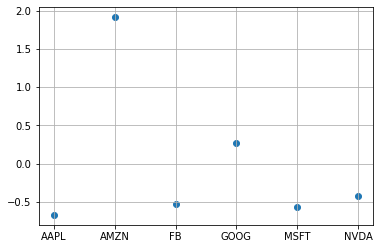

In [99]:
plt.scatter(x=z.index,y=Z_Score)
plt.grid()
plt.show()

In [101]:
z1= df3[df3['Sector']==('TECH')]
z1.head()

,Record ID,horizon,amount,Date1,Date2,BUY,SELL,expected_return,inf,Company Name,Sector,Stock Pur.,HQ,Profit_Loss
31796,192748,1,100,2013-10-10,2013-10-11,14.473812,14.351554,0.001351,1.41,NVDA,TECH,100,France,-12.225818
31797,210771,6,1500,2013-10-10,2013-10-16,14.473812,14.671314,0.008106,1.41,NVDA,TECH,1500,France,296.253210
31798,80211,30,1500,2013-10-10,2013-11-08,14.473812,14.633692,0.040530,1.41,NVDA,TECH,1500,France,239.819535
31799,197029,60,200,2013-10-10,2013-12-09,14.473812,14.381998,0.081060,1.41,NVDA,TECH,200,France,-18.362808
31800,217591,100,1500,2013-10-10,2014-01-17,14.473812,15.119535,0.135101,1.41,NVDA,TECH,1500,France,968.585025


In [104]:
z1['z_score']=(z1['Profit_Loss']-z1['Profit_Loss'].mean())/stdev(z1['Profit_Loss'])


C:\Users\deepa\AppData\Local\Temp/ipykernel_1724/4225466115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1['z_score']=(z1['Profit_Loss']-z1['Profit_Loss'].mean())/stdev(z1['Profit_Loss'])


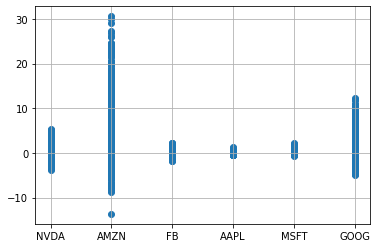

In [106]:
plt.scatter(x=z1['Company Name'],y=z1['z_score'])
plt.grid()
plt.show()